In [1]:
import pandas as pd
import jieba
from snownlp import SnowNLP

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 15})

In [3]:
df = pd.read_csv("whisper.csv", encoding="utf-8")
df['content'] = df['content'].astype(str)

In [4]:
df.shape

(4881, 3)

In [5]:
df.tail()

,id,content,publishTime
4876,4837,万能的灯友啊，求助，是这样的，我有一个宿友擤鼻涕的声音特别大，这几天早上我都被她擤鼻涕的声音...,2017-11-03 08:24:25
4877,4838,嗯，其他高校大一，就是感觉很孤独，感觉没有人可以真正走进自己，包括亲人朋友，这几天一直沉浸在...,2017-11-03 09:13:05
4878,4839,想问下大家 电子书Kindle大家用的怎么样 最近想入手 不过听说闪屏？？在纠结平板电脑还是...,2017-11-03 10:13:06
4879,4840,开学两个月了，朋友很少，压力很大，和导师的关系处的没有同门好，觉得自己能力也不够，很累，成年...,2017-11-03 10:25:25
4880,4841,感觉最近糟糕透了。因为跑了800米被风吹加上工作原因搞得嗓子说不了话来，然后又因为这个普通话...,2017-11-03 17:35:33


In [6]:
def my_sentiments(text):
    return SnowNLP(text).sentiments

In [7]:
df["sentiments"] = df.content.apply(my_sentiments)

In [10]:
df["date"] = pd.to_datetime(df['publishTime']) #将数据类型转换为日期类型
df = df.set_index("date")

In [11]:
print(df["2016-11"]["sentiments"].mean())
print(df["2016-11"]["sentiments"].std()) # 样本标准差（无偏）

0.7414227832820064
0.38153703780556203


In [12]:
# 要把索引删除才能成功运行如下函数，所以这个book无法按顺序执行，可以先把月份、一天、小时做完了，最后再做星期的分析，这时先运行：
df["date"] = pd.to_datetime(df['publishTime']) #将数据类型转换为日期类型
df["dayofweek"] = df["date"].apply(lambda x:x.weekday())

In [13]:
import time
def get_hour(publishTime):
    if publishTime != 'nan':
        return int(time.strptime(publishTime, "%Y-%m-%d %H:%M:%S").tm_hour)
    else:
        return -1

In [14]:
df['publishTime'] = df['publishTime'].astype(str)
df["hour"] = df['publishTime'].apply(lambda x: get_hour(x))


In [15]:
# DAY AND NIGHT !!!
periods = [(6,17), (18,5)]
sentiments_hour_mean_trend = []
sentiments_hour_std_trend = []
whisper_hour_number = []

sentiments_hour_mean_trend.append(df[(df['hour'] >= 6) & (df['hour']<= 17)].sentiments.mean())
sentiments_hour_std_trend.append(df[(df['hour'] >= 6) & (df['hour']<= 17)].sentiments.std())
whisper_hour_number.append(df[(df['hour'] >= 6) & (df['hour']<= 17)].sentiments.count())

sentiments_hour_mean_trend.append(df[(df['hour'] >= 18) | (df['hour']<= 5)].sentiments.mean())
sentiments_hour_std_trend.append(df[(df['hour'] >= 18) | (df['hour']<= 5)].sentiments.std())
whisper_hour_number.append(df[(df['hour'] >= 18) | (df['hour']<= 5)].sentiments.count())

print(sentiments_hour_mean_trend)
print(sentiments_hour_std_trend)
print(whisper_hour_number)
whisper_hour_ratio = []
for i in range(2):
    whisper_hour_ratio.append(whisper_hour_number[i]/sum(whisper_hour_number))
print(whisper_hour_ratio)

[0.7577784935223311, 0.7659006293260301]
[0.37389398029022153, 0.3621465035262091]
[1712, 3169]
[0.35074779758246261, 0.64925220241753734]


E:\UsefulTools\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


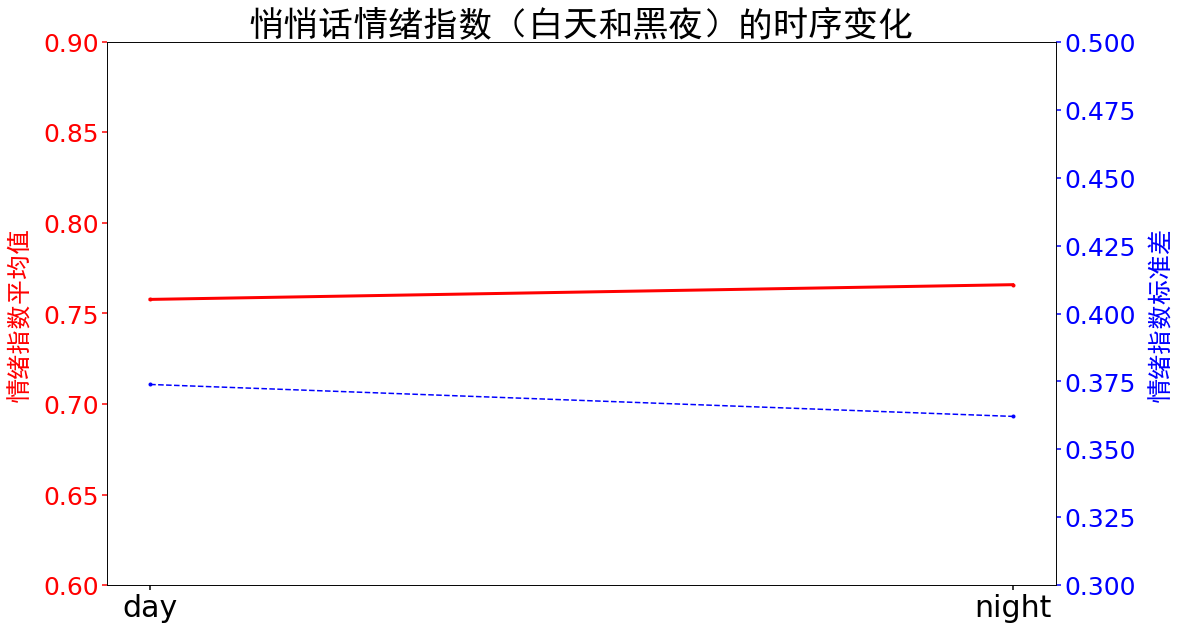

In [83]:
# DAY AND NIGHT !!!

xs = ["day", "night"]

# plot hour
fig, left_axis=plt.subplots(figsize=(17, 10))
right_axis = left_axis.twinx()  

p1, = left_axis.plot(list(range(2)), sentiments_hour_mean_trend, 'r.-', lw=3)  
p2, = right_axis.plot(list(range(2)), sentiments_hour_std_trend, 'b.--', lw=1.5)  

left_axis.set_ylim((0.6, 0.9))
right_axis.set_ylim((0.3, 0.5))

left_axis.set_xticks(list(range(2)))
left_axis.set_xticklabels(xs, fontsize=18)

for tick in left_axis.xaxis.get_major_ticks():
    tick.label1.set_fontsize(30)
for tick in left_axis.yaxis.get_major_ticks():
    tick.label1.set_fontsize(25)
for tick in right_axis.xaxis.get_major_ticks():
    tick.label2.set_fontsize(30)
for tick in right_axis.yaxis.get_major_ticks():
    tick.label2.set_fontsize(25)
    
left_axis.set_xlabel(u"", fontproperties='SimHei')
left_axis.set_ylabel(u"情绪指数平均值", fontproperties='SimHei',fontsize=25,labelpad = 12.5)
right_axis.set_ylabel(u"情绪指数标准差", fontproperties='SimHei',fontsize=25,labelpad = 12.5)

left_axis.yaxis.label.set_color(p1.get_color())  
right_axis.yaxis.label.set_color(p2.get_color())  
tkw = dict(size=5, width=1.5)  
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)  
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)  
left_axis.tick_params(axis='x', **tkw)  

left_axis.set_title(u"悄悄话情绪指数（白天和黑夜）的时序变化", fontproperties='SimHei',fontsize=35)
fig.savefig('D:\genie\whisper_day_varient_readable.png', dpi=100)
fig

In [46]:
# per hour

sentiments_hour_mean_trend = []
sentiments_hour_std_trend = []
whisper_hour_number = []
for hour in range(24):
    sentiments_hour_mean_trend.append(df[df['hour']==hour].sentiments.mean())
    sentiments_hour_std_trend.append(df[df['hour']==hour].sentiments.std())
    whisper_hour_number.append(df[df['hour']==hour].sentiments.count())
print(sentiments_hour_mean_trend)
print(sentiments_hour_std_trend)
print(whisper_hour_number)
whisper_hour_ratio = []
for i in range(24):
    whisper_hour_ratio.append(whisper_hour_number[i]/sum(whisper_hour_number))
print(whisper_hour_ratio)

[0.7944287574912527, 0.8052823793961853, 0.7896380878750947, 0.7194067984692617, 0.7223726033211918, 0.5934657996040695, 0.8284566523177915, 0.8024108057863714, 0.7384417646881348, 0.7519057564262881, 0.7706300316034248, 0.7480399189710243, 0.7296317675863517, 0.7318063404979883, 0.7842068786487467, 0.8179046273794913, 0.7821675658989602, 0.6974528464545692, 0.7188132743318383, 0.7511548138626573, 0.7456237004567806, 0.7452295524675471, 0.7553787592030006, 0.7877361549554622]
[0.3469264854252618, 0.34578445751948395, 0.3659385608591228, 0.4105273860121964, 0.4077068889047291, 0.45817871360075657, 0.33872471396680287, 0.3527627334794003, 0.3874658349428981, 0.387168184622754, 0.364037172236251, 0.3740619977720105, 0.38985955981553555, 0.3989916495779348, 0.369365784988571, 0.3320656385032938, 0.34398606684156335, 0.39561110193846516, 0.3940462165331973, 0.381774994583163, 0.3780217958549666, 0.37607190981901706, 0.3609631661104319, 0.3525913673328351]
[619, 285, 102, 40, 19, 17, 19, 58,

E:\UsefulTools\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


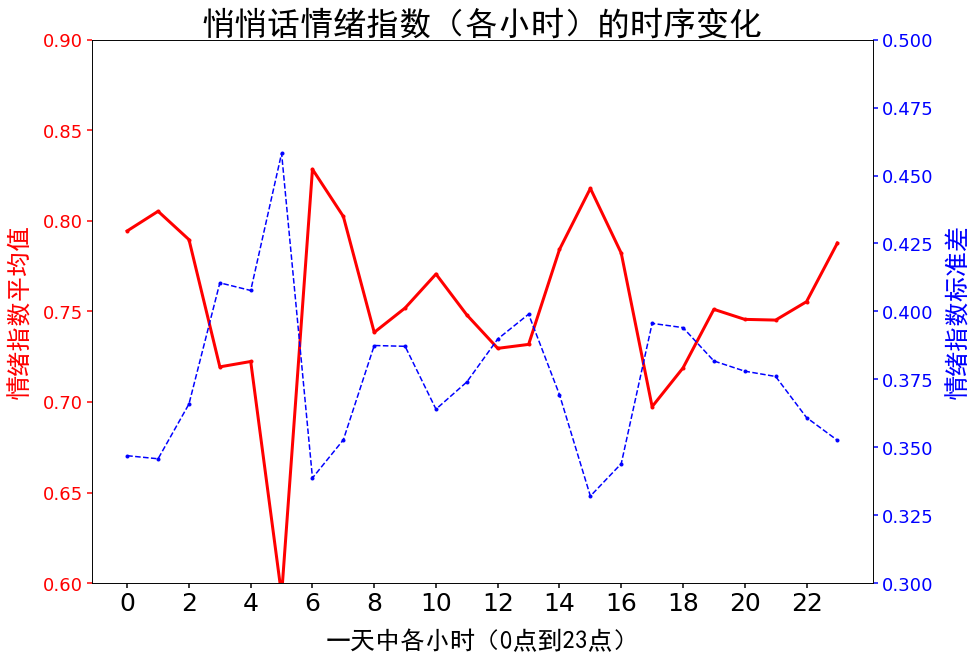

In [59]:
# per hour

# plot hour
fig, left_axis=plt.subplots(figsize=(14, 10))
right_axis = left_axis.twinx()  

p1, = left_axis.plot(list(range(24)), sentiments_hour_mean_trend, 'r.-', lw=3)  
p2, = right_axis.plot(list(range(24)), sentiments_hour_std_trend, 'b.--', lw=1.5)  

left_axis.set_ylim((0.6, 0.9))
right_axis.set_ylim((0.3, 0.5))

left_axis.set_xticks(list(range(24))[::2])

for tick in left_axis.xaxis.get_major_ticks():
    tick.label1.set_fontsize(25)
for tick in left_axis.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in right_axis.xaxis.get_major_ticks():
    tick.label2.set_fontsize(25)
for tick in right_axis.yaxis.get_major_ticks():
    tick.label2.set_fontsize(18)

left_axis.set_xlabel(u"一天中各小时（0点到23点）", fontproperties='SimHei',fontsize=25,labelpad = 12.5)
left_axis.set_ylabel(u"情绪指数平均值", fontproperties='SimHei',fontsize=25,labelpad = 12.5)
right_axis.set_ylabel(u"情绪指数标准差", fontproperties='SimHei',fontsize=25,labelpad = 12.5)

left_axis.yaxis.label.set_color(p1.get_color())  
right_axis.yaxis.label.set_color(p2.get_color())  
tkw = dict(size=5, width=1.5)  
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)  
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)  
left_axis.tick_params(axis='x', **tkw)  

left_axis.set_title(u"悄悄话情绪指数（各小时）的时序变化", fontproperties='SimHei',fontsize=33)
fig.savefig('D:\genie\whisper_each_hour_varient_readable.png', dpi=100)
fig

In [60]:
# 4 periods！！！

periods = [(6,11), (12,17), (18,23), (0,5)]
sentiments_hour_mean_trend = []
sentiments_hour_std_trend = []
whisper_hour_number = []
for period in periods:
    sentiments_hour_mean_trend.append(df[(df['hour'] >= period[0]) & (df['hour']<= period[1])].sentiments.mean())
    sentiments_hour_std_trend.append(df[(df['hour'] >= period[0]) & (df['hour']<= period[1])].sentiments.std())
    whisper_hour_number.append(df[(df['hour'] >= period[0]) & (df['hour']<= period[1])].sentiments.count())
print(sentiments_hour_mean_trend)
print(sentiments_hour_std_trend)
print(whisper_hour_number)
whisper_hour_ratio = []
for i in range(4):
    whisper_hour_ratio.append(whisper_hour_number[i]/sum(whisper_hour_number))
print(whisper_hour_ratio)

[0.7601729177636454, 0.7563056967248456, 0.7605643823312151, 0.7896397726186694]
[0.3732758780680227, 0.37444213871282445, 0.3671161957919164, 0.35444626589339745]
[652, 1060, 2025, 1082]
[0.13529777962232828, 0.2199626478522515, 0.42021166217057482, 0.2245279103548454]


E:\UsefulTools\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


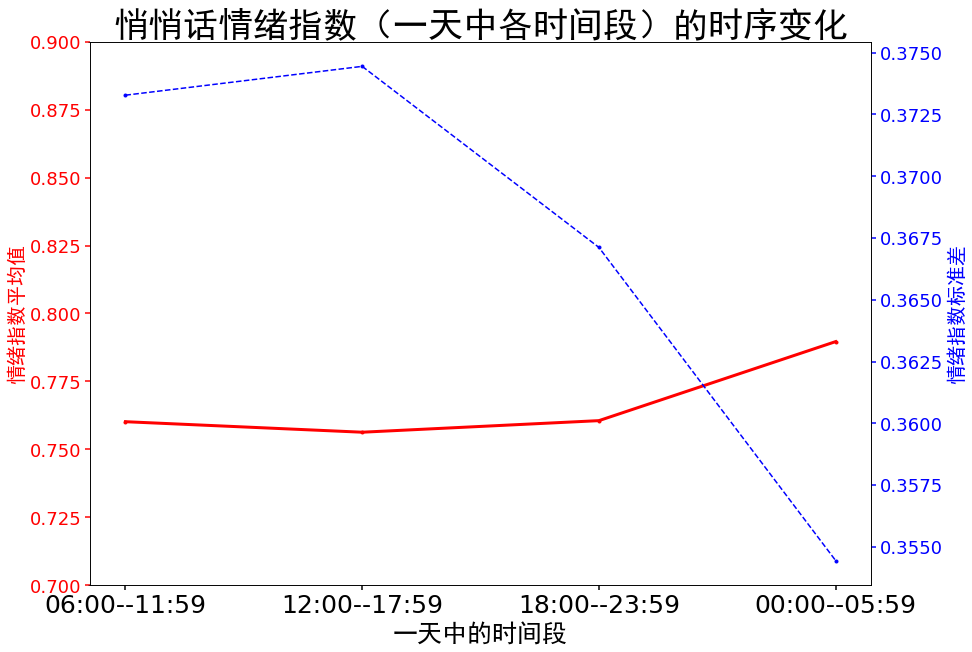

In [61]:
xs = ["06:00--11:59", "12:00--17:59", "18:00--23:59", "00:00--05:59"]

# plot hour
fig, left_axis=plt.subplots(figsize=(14, 10))
right_axis = left_axis.twinx()  

p1, = left_axis.plot(list(range(4)), sentiments_hour_mean_trend, 'r.-', lw=3)  
p2, = right_axis.plot(list(range(4)), sentiments_hour_std_trend, 'b.--', lw=1.5)  

left_axis.set_ylim((0.7, 0.9))
left_axis.set_yticks([0.7, 0.9],['$BAD\ (mean=0.7)$', '$GOOD\ (mean=0.9)$'])
left_axis.set_xticks(list(range(4)))
left_axis.set_xticklabels(xs, fontsize=18)

for tick in left_axis.xaxis.get_major_ticks():
    tick.label1.set_fontsize(25)
for tick in left_axis.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in right_axis.xaxis.get_major_ticks():
    tick.label2.set_fontsize(25)
for tick in right_axis.yaxis.get_major_ticks():
    tick.label2.set_fontsize(18)

left_axis.set_xlabel(u"一天中的时间段", fontproperties='SimHei',fontsize=25)
left_axis.set_ylabel(u"情绪指数平均值", fontproperties='SimHei',fontsize=20)
right_axis.set_ylabel(u"情绪指数标准差", fontproperties='SimHei',fontsize=20)

left_axis.yaxis.label.set_color(p1.get_color())  
right_axis.yaxis.label.set_color(p2.get_color())  
tkw = dict(size=5, width=1.5)  
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)  
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)  
left_axis.tick_params(axis='x', **tkw)  

left_axis.set_title(u"悄悄话情绪指数（一天中各时间段）的时序变化", fontproperties='SimHei',fontsize=35)
fig.savefig('D:\genie\whisper_hour_varient_readable.png', dpi=100, pad_inches=10)
fig

In [37]:
# ONE WEEK !!!

dayofweeks = list(range(7))
sentiments_dayofweek_mean_trend = []
sentiments_dayofweek_std_trend = []
whisper_dayofweek_number = []
for dayofweek in dayofweeks:    
    sentiments_dayofweek_mean_trend.append(df[df['dayofweek'] == dayofweek].sentiments.mean())
    sentiments_dayofweek_std_trend.append(df[df['dayofweek'] == dayofweek].sentiments.std())
    whisper_dayofweek_number.append(df[df['dayofweek'] == dayofweek].sentiments.count())
print(sentiments_dayofweek_mean_trend)
print(sentiments_dayofweek_std_trend)
print(whisper_dayofweek_number)
whisper_dayofweek_ratio = []
for i in range(7):
    whisper_dayofweek_ratio.append(whisper_dayofweek_number[i]/sum(whisper_dayofweek_number))
print(whisper_dayofweek_ratio)

[0.7762678338547313, 0.7723771540211773, 0.7490924648527708, 0.7678521575830886, 0.73961254339283, 0.7661725019017891, 0.7880638369513709]
[0.35768260025142173, 0.3611018933218778, 0.3818434531503956, 0.3647418213278349, 0.3930379110746773, 0.3613926152765567, 0.3488158214202535]
[733, 710, 681, 662, 652, 664, 717]
[0.15210624610915127, 0.1473334716746213, 0.14131562564847477, 0.13737289894168914, 0.13529777962232828, 0.13778792280556132, 0.14878605519817389]


In [62]:
months = ["2016-11", "2016-12", 
          "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06",
          "2017-07", "2017-08", "2017-09", "2017-10", "2017-11",]
sentiments_mean_trend = []
sentiments_std_trend = []
whisper_monthly_number = []
for month in months:
    sentiments_mean_trend.append(df[month]["sentiments"].mean())
    sentiments_std_trend.append(df[month]["sentiments"].std())
    whisper_monthly_number.append(df[month]["content"].count())
print(sentiments_mean_trend)
print(sentiments_std_trend)
print(whisper_monthly_number)

[0.7414227832820064, 0.7916062374993419, 0.8525374152870191, 0.846422867512847, 0.7763511967131402, 0.7547588663867404, 0.7592901631058455, 0.7399622163558606, 0.7339515058798969, 0.7600155606524014, 0.7646010756791881, 0.7439820169116129, 0.7144070154939167]
[0.38153703780556203, 0.35877923037020054, 0.31402472192925596, 0.3221727567247749, 0.35790512789288165, 0.3605752418110045, 0.36842803419191156, 0.3803841774420895, 0.3795672370334187, 0.3639823822730304, 0.3711964586555941, 0.38352476504869515, 0.40594714409172794]
[243, 355, 283, 258, 355, 428, 602, 548, 365, 396, 433, 500, 53]


E:\UsefulTools\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


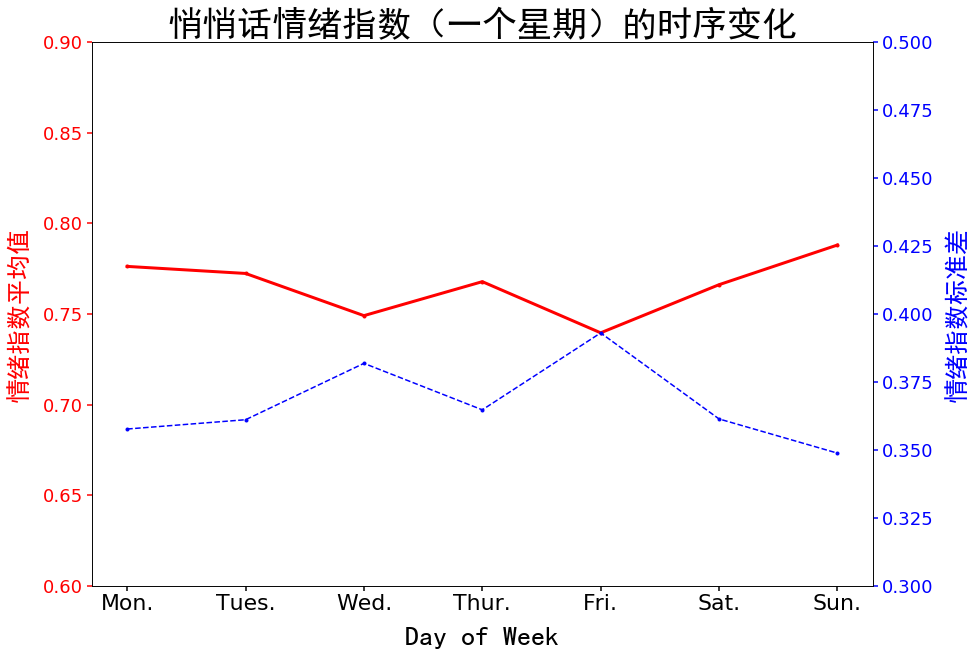

In [70]:
xs = ["Mon.", "Tues.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]

# plot dayofweek
fig, left_axis=plt.subplots(figsize=(14, 10))
right_axis = left_axis.twinx()  

p1, = left_axis.plot(dayofweeks, sentiments_dayofweek_mean_trend, 'r.-', lw=3)  
p2, = right_axis.plot(dayofweeks, sentiments_dayofweek_std_trend, 'b.--', lw=1.5)  

left_axis.set_ylim((0.6, 0.9))
right_axis.set_ylim((0.3, 0.5))

left_axis.set_xticks(dayofweeks)
left_axis.set_xticklabels(xs, fontsize=18)

left_axis.set_xlabel(u"Day of Week", fontproperties='SimHei',fontsize=28,labelpad = 12.5)
left_axis.set_ylabel(u"情绪指数平均值", fontproperties='SimHei',fontsize=25,labelpad = 12.5)
right_axis.set_ylabel(u"情绪指数标准差", fontproperties='SimHei',fontsize=25,labelpad = 12.5)

for tick in left_axis.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
for tick in left_axis.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in right_axis.xaxis.get_major_ticks():
    tick.label2.set_fontsize(22)
for tick in right_axis.yaxis.get_major_ticks():
    tick.label2.set_fontsize(18)

left_axis.yaxis.label.set_color(p1.get_color())  
right_axis.yaxis.label.set_color(p2.get_color())  
tkw = dict(size=5, width=1.5)  
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)  
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)  
left_axis.tick_params(axis='x', **tkw)  

left_axis.set_title(u"悄悄话情绪指数（一个星期）的时序变化", fontproperties='SimHei',fontsize=35)
fig.savefig('D:\genie\whisper_dayofweek_varient_readable.png', dpi=100)
fig

E:\UsefulTools\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


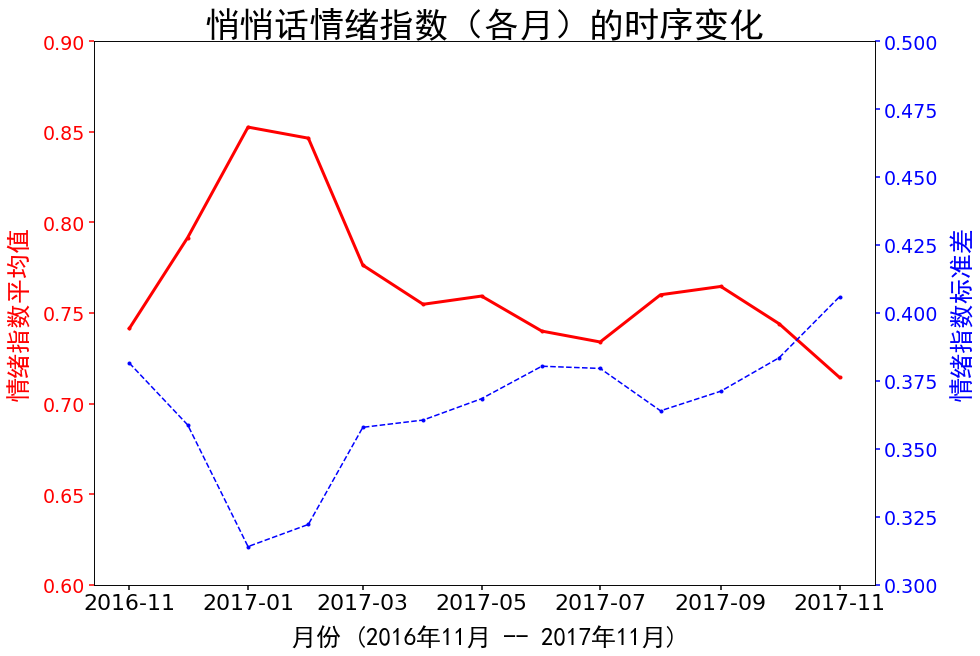

In [72]:
from datetime import datetime
xs = [datetime.strptime(d, '%Y-%m').date() for d in months]

# plot month
fig, left_axis=plt.subplots(figsize=(14, 10))
right_axis = left_axis.twinx()  

p1, = left_axis.plot(xs, sentiments_mean_trend, 'r.-', lw=3)  
p2, = right_axis.plot(xs, sentiments_std_trend, 'b.--', lw=1.5)  

left_axis.set_ylim((0.6, 0.9))
right_axis.set_ylim((0.3, 0.5))

left_axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
left_axis.set_xticks(xs[::2])
#left_axis.set_xticklabels(xs, fontsize=18)

for tick in left_axis.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
for tick in left_axis.yaxis.get_major_ticks():
    tick.label1.set_fontsize(19)
for tick in right_axis.xaxis.get_major_ticks():
    tick.label2.set_fontsize(22)
for tick in right_axis.yaxis.get_major_ticks():
    tick.label2.set_fontsize(19)
    
left_axis.set_xlabel(u"月份 (2016年11月 -- 2017年11月)", fontproperties='SimHei',fontsize=25,labelpad = 12.5)
left_axis.set_ylabel(u"情绪指数平均值", fontproperties='SimHei',fontsize=25,labelpad = 12.5)
right_axis.set_ylabel(u"情绪指数标准差", fontproperties='SimHei',fontsize=25,labelpad = 12.5)

left_axis.yaxis.label.set_color(p1.get_color())  
right_axis.yaxis.label.set_color(p2.get_color())  
tkw = dict(size=5, width=1.5)  
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)  
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)  
left_axis.tick_params(axis='x', **tkw)  

left_axis.set_title(u"悄悄话情绪指数（各月）的时序变化", fontproperties='SimHei',fontsize=35)
fig.savefig('D:\genie\whisper_month_varient_readable.png', dpi=100)
fig